 
# Matplotlib 必须掌握的 50 个可视化图表（附完整 Python 源代码）

本文总结了 Matplotlib 以及 Seaborn 用的最多的50个图形，掌握这些图形的绘制，对于数据分析的可视化有莫大的作用，强烈推荐大家阅读后续内容。

如果觉得内容不错，欢迎分享到您的朋友圈。

Tips：

（1）本文原文部分代码有不准确的地方，已进行修改；

（2）所有正确的源代码，我已整合到 jupyter notebook 文件中，可以在公众号『Python数据之道』后台回复 “code”，可获得本文源代码；

（3）运行本文代码，除了安装 matplotlib 和 seaborn 可视化库外，还需要安装其他的一些辅助可视化库，已在代码部分作标注，具体内容请查看下面文章内容。

（4）本文完整的翻译文章来自 http://liyangbit.com/



在数据分析和可视化中最有用的 50 个 Matplotlib 图表。 这些图表列表允许您使用 python 的 matplotlib 和 seaborn 库选择要显示的可视化对象。

## 介绍
这些图表根据可视化目标的7个不同情景进行分组。 例如，如果要想象两个变量之间的关系，请查看“相关”部分下的图表。 或者，如果您想要显示值如何随时间变化，请查看“更改”部分，依此类推。


有效图表的重要特征：

* 在不歪曲事实的情况下传达正确和必要的信息。
* 设计简单，您不必太费力就能理解它。
* 从审美角度支持信息而不是掩盖信息。
* 信息没有超负荷。

## 准备工作

在代码运行前先引入下面的设置内容。 当然，单独的图表，可以重新设置显示要素。

plt设置seaborn的style的可能选项有：bright，colorblind，dark，dark-palette，darkgrid，deep，muted，notebook，paper，pastel，poster，talk，ticks，white，whitegrid

In [22]:
# !pip install brewer2mpl
import numpy as np
from random import randint
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')



large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style("white")
%matplotlib inline

# 设置中文显示
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.6.2
0.13.2


## 组成 （Composition）

### 华夫饼图 （Waffle Chart）

可以使用 pywaffle包 创建华夫饼图，并用于显示更大群体中的组的组成。

（『Python数据之道』注：需要安装 pywaffle 库）

In [111]:
#! pip install pywaffle
# Reference: https://stackoverflow.com/questions/41400136/how-to-do-waffle-charts-in-python-square-piechart
from pywaffle import Waffle

# Import
df_raw = pd.read_csv("Data/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': df['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in df[['class', 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=7,
    colors=colors,
    figsize=(16, 9)
)

ModuleNotFoundError: No module named 'pywaffle'

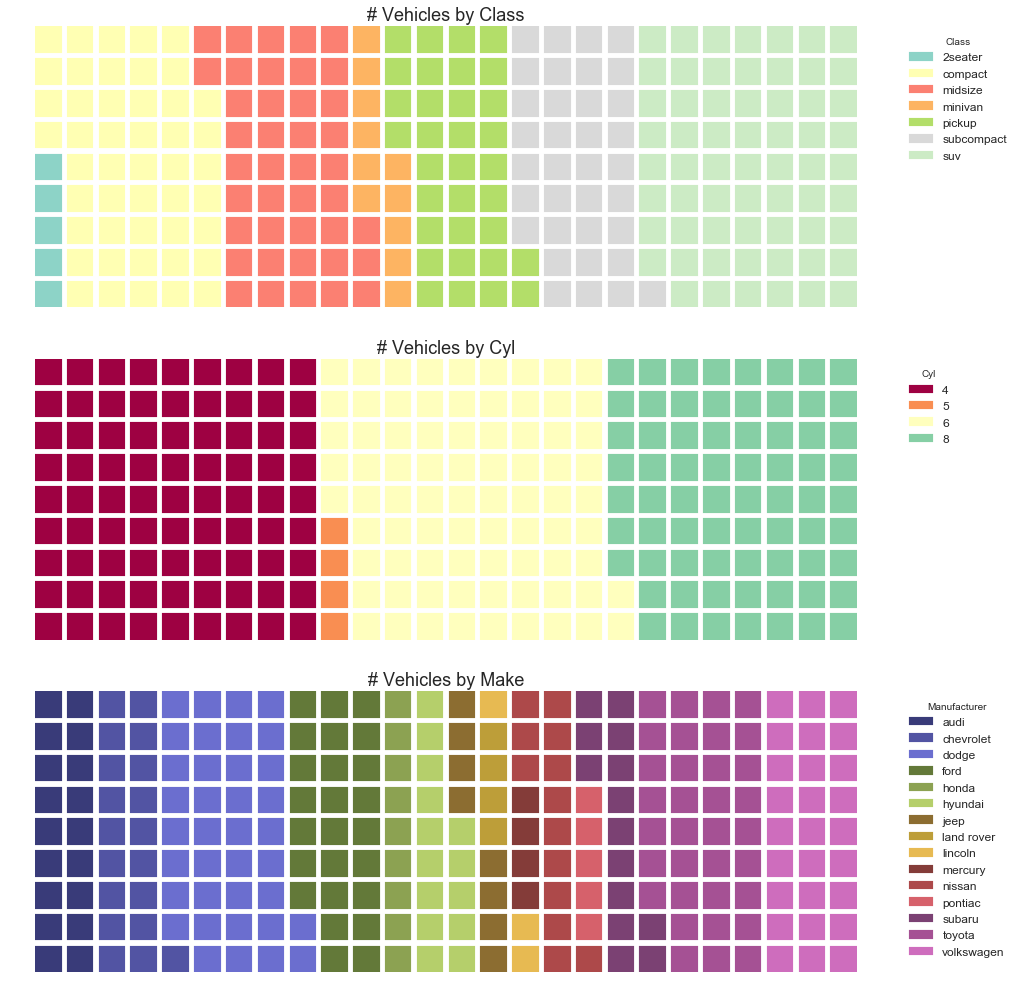

In [36]:
#! pip install pywaffle
from pywaffle import Waffle

# Import
# df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
# By Class Data
df_class = df_raw.groupby('class').size().reset_index(name='counts_class')
n_categories = df_class.shape[0]
colors_class = [plt.cm.Set3(i/float(n_categories)) for i in range(n_categories)]

# By Cylinders Data
df_cyl = df_raw.groupby('cyl').size().reset_index(name='counts_cyl')
n_categories = df_cyl.shape[0]
colors_cyl = [plt.cm.Spectral(i/float(n_categories)) for i in range(n_categories)]

# By Make Data
df_make = df_raw.groupby('manufacturer').size().reset_index(name='counts_make')
n_categories = df_make.shape[0]
colors_make = [plt.cm.tab20b(i/float(n_categories)) for i in range(n_categories)]


# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '311': {
            'values': df_class['counts_class'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_class[['class', 'counts_class']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Class'},
            'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize':18},
            'colors': colors_class
        },
        '312': {
            'values': df_cyl['counts_cyl'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_cyl[['cyl', 'counts_cyl']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Cyl'},
            'title': {'label': '# Vehicles by Cyl', 'loc': 'center', 'fontsize':18},
            'colors': colors_cyl
        },
        '313': {
            'values': df_make['counts_make'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_make[['manufacturer', 'counts_make']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Manufacturer'},
            'title': {'label': '# Vehicles by Make', 'loc': 'center', 'fontsize':18},
            'colors': colors_make
        }
    },
    rows=9,
    figsize=(16, 14)
)

### 饼图 （Pie Chart）

饼图是显示组成的经典方式。 然而，现在通常不建议使用它，因为馅饼部分的面积有时会变得误导。 因此，如果您要使用饼图，强烈建议明确记下饼图每个部分的百分比或数字。

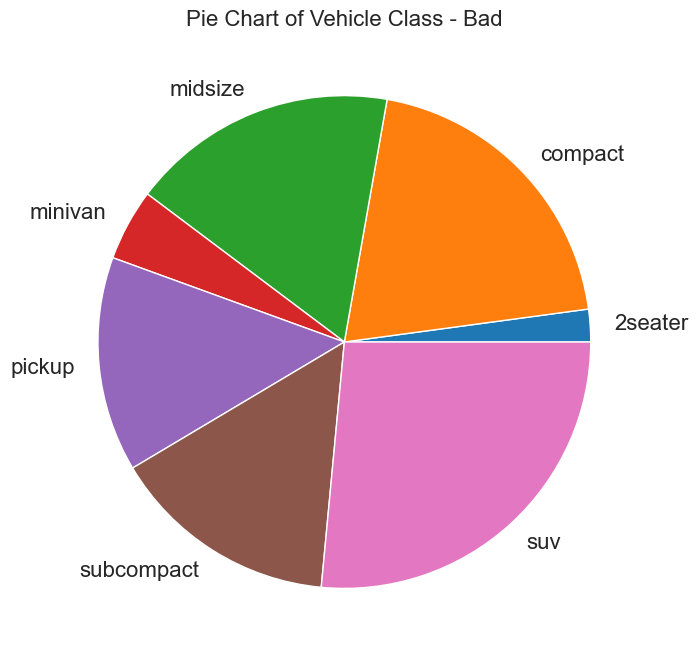

In [112]:
# Import
df_raw = pd.read_csv("Data/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size()

# Make the plot with pandas
df.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Pie Chart of Vehicle Class - Bad")
plt.ylabel("")
plt.show()

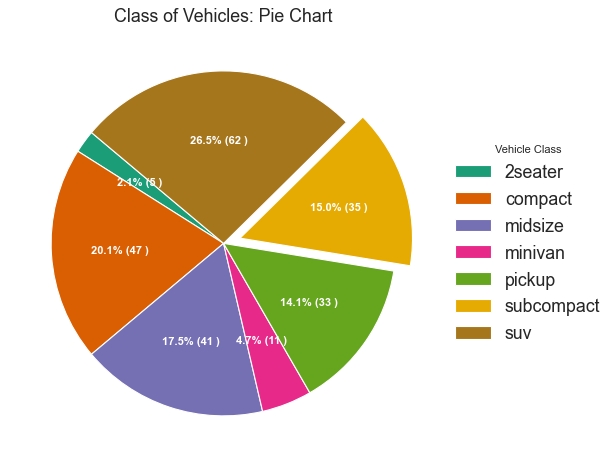

In [113]:
# Import
df_raw = pd.read_csv("Data/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df['counts']
categories = df['class']
explode = [0,0,0,0,0,0.1,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Vehicle Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Class of Vehicles: Pie Chart")
plt.show()

### 树形图 （Treemap）

树形图类似于饼图，它可以更好地完成工作而不会误导每个组的贡献。

（『Python数据之道』注：需要安装 squarify 库）

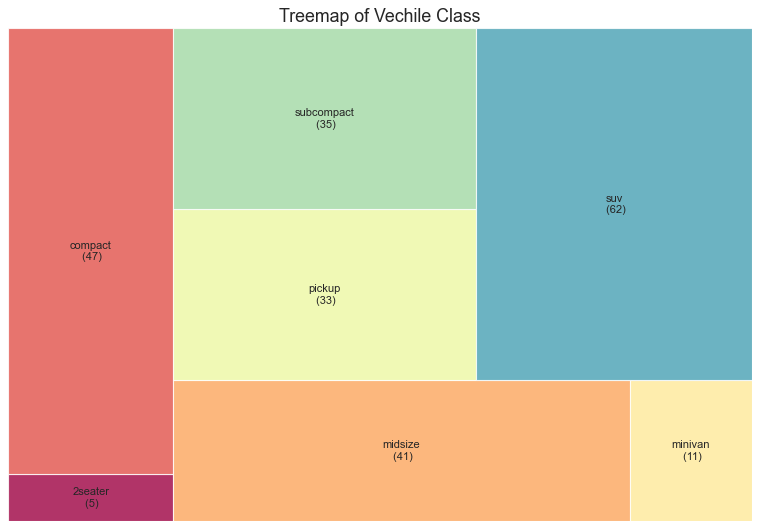

In [115]:
# pip install squarify
import squarify 

# Import Data
df_raw = pd.read_csv("Data/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Vechile Class')
plt.axis('off')
plt.show()

### 条形图 （Bar Chart）

条形图是基于计数或任何给定指标可视化项目的经典方式。 在下面的图表中，我为每个项目使用了不同的颜色，但您通常可能希望为所有项目选择一种颜色，除非您按组对其进行着色。 颜色名称存储在下面代码中的all_colors中。 您可以通过在`plt.plot（）`中设置颜色参数来更改条的颜色。


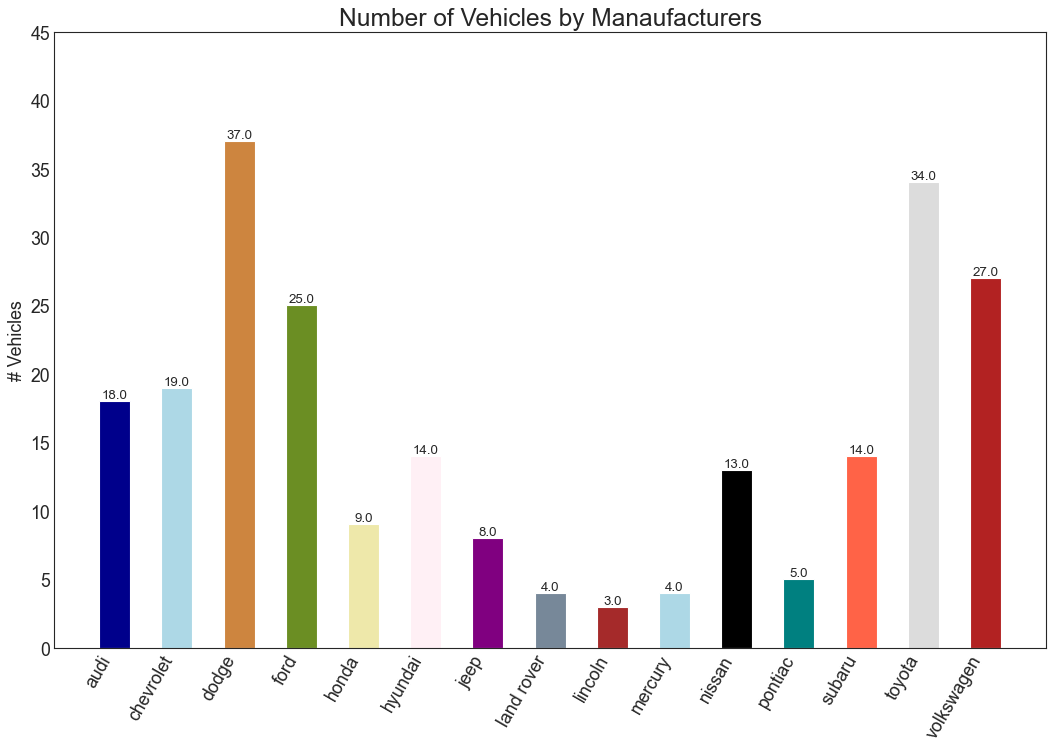

In [123]:
import random

# Import Data
df_raw = pd.read_csv("Data/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('manufacturer').size().reset_index(name='counts')
n = df['manufacturer'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df['manufacturer'], df['counts'], color=c, width=.5)
for i, val in enumerate(df['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df['manufacturer'], rotation=60, horizontalalignment= 'right')
plt.title("Number of Vehicles by Manaufacturers", fontsize=22)
plt.ylabel('# Vehicles')
plt.ylim(0, 45)
plt.show()